<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/Make_Knowledge_Graph_RAG_With_LLAMA_INDEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Knowledge Graph Using LLAMA-Index
This code implementation will walk you through creating a knowledge graph using Llamna Index . Her we will read a .pdf file can convert into a structured knowledge graph

##Install Required Dependencies

In [ ]:
%%capture
pip install llama_index pyvis Ipython langchain pypdf

## Enabling Daignostic Logging
* Logging provides valuable insights into code execution.
* Here Logging Level is set to "INFO" which will output messages that assist in monitoring the applications's operational flow

In [ ]:
import logging
import sys
#
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

## Import required dependencies

In [ ]:
from llama_index import (SimpleDirectoryReader,
                         LLMPredictor,
                         ServiceContext,
                         KnowledgeGraphIndex)
#
from llama_index.graph_stores import SimpleGraphStore
from llama_index.storage.storage_context import StorageContext
from llama_index.llms import HuggingFaceInferenceAPI
from langchain.embeddings import HuggingFaceInferenceAPIEmbeddings
from llama_index.embeddings import LangchainEmbedding
from pyvis.network import Network

## Concise overview of the Packages used
* SimpleDirectoryReader : to read unstructured data.
* LLMPredictor : Utilized for generating predictions using large language models(LLM)
* ServiceContext : Supples contextual data vital for orchestrating various services
* KnowledgeGraphIndex : Required for both construction and manipulation of Knowledge Graphs.
* SimpleGraphStore : Serves as a straightforward repoistory for storing graph data.
* HuggingFaceInferenceAPI: Modeule for leveraging Open-Source LLMs.


##Set up the LLM

In [ ]:
HF_TOKEN = "Your_Huugingface_API_Token"
llm = HuggingFaceInferenceAPI(
    model_name="HuggingFaceH4/zephyr-7b-beta", token=HF_TOKEN
)

## Setup the Embedding Model

In [ ]:
embed_model = LangchainEmbedding(
  HuggingFaceInferenceAPIEmbeddings(api_key=HF_TOKEN,model_name="thenlper/gte-large")
)

## Construct the Knowledge Graph Index

#### locate data folder

In [ ]:
import os
os.mkdir("Documents")

#### read the documents

In [ ]:
documents = SimpleDirectoryReader("/content/Documents").load_data()
print(len(documents))

44


## setup the service context

In [ ]:
service_context = ServiceContext.from_defaults(
    chunk_size=256,
    llm=llm,
    embed_model=embed_model
)

## setup the storage context

In [ ]:
graph_store = SimpleGraphStore()
storage_context = StorageContext.from_defaults(graph_store=graph_store)

## Construct Knowledge Graph Index

In [ ]:
index = KnowledgeGraphIndex.from_documents( documents=documents,
                                           max_triplets_per_chunk=3,
                                           service_context=service_context,
                                           storage_context=storage_context,
                                          include_embeddings=True)


## Knowledge Graph created from Document
```
Text: page_label: 2
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

What is an ESOP?
Triplets:
(page_label, is, 2)
(ESOP, is, What is an ESOP?)
---------------------
Text: page_label: 3
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

Why Offer an ESOP?
Triplets:
(page_label, is, 3)
(ESOP, is, Why Offer an ESOP?)
---------------------
Text: page_label: 4
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-P
(page_label, is, part of)
(page_label, is, Table of Contents)
(file_path, is, path of)
(file_path, is, /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf)
(ESOP, is, part of)
(ESOP, is, Intro to Options Plans)
(Option, is, part of)
(Option, is, Intro to Options Plans)
(Lifecycle of a Startup ESOP, is, part of)
(Lifecycle of a Startup ESOP, is, Intro to Options Plans)
(Common Terms in an Options Package, is, part of)
(Common Terms in an Options Package, is, Intro to Options Plans)
(Why Issue Options to Employees, is, part of)
(Why Issue Options to Employees, is, Intro to Options Plans)
(A Defining Characteristic of Startup Culture, is, part of)
(A Defining Characteristic of Startup Culture, is, Why Issue Options to Em
(ESOP, is, equity compensation plan)
(ESOP, is, employee stock option plan)
(ESOP, is, part of startup culture)
(ESOP, is, necessary part of capital structure)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)
(ESOP, is, defined characteristic of startup culture)

(page_label, is, 3)
(INTRO TO OPTIONS PLANS, is, Part I)
---------------------
Text: The 2018 Annual Report of the Board of Trustees of the University of Arkansas System is presented here as a PDF file.
Triplets:
(The, is, PDF file)
(The, is presented, here)
(The, is, The 2018 Annual Report of the Board of Trustees of the University of Arkansas System)
---------------------
Text: The 2018 Annual Report of the Board of Trustees of the University of Arkansas System is presented here as a PDF file.
Triplets:
(The, is, PDF file)
(The, is presented, here)
(The, is, The 2018 Annual Report of the Board of Trustees of the University of Arkansas System)
---------------------
Text: The 2018 Annual Report of the Board of Trustees of the University of Arkansas System is presented here as a PDF file.
Triplets:
(The, is, PDF file)
(The, is presented, here)
(The,
(ESOP, is, Employee Stock Options Plan)
(ESOP, is, allocation)
(ESOP, is, plan)
---------------------
Text: page_label: 5
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

What is an ESOP?  
•An Employee Stock Options Plan (ESOP)  

•An allocation  of shares that will be granted to employees in the future
in the form of stock options  
–How much equity should we set aside for employees?  

•A plan for how these options will be distributed:  
–How many shares will individual employees receive?  
–What terms will govern these grants?  

•The plan is as important as the allocation!
Triplets:
(ESOP, is, allocation)
(ESOP, is, plan)
(ESOP, is, important)
---------------------
Text: page_label: 6
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-
(Option, is, effective form of equity ownership)
(Option, has, intrinsic value)
(Option, is, locked-in price for shares)
---------------------
Text: page_label: 1
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

What is an ESOP?  
•What is an ESOP?  
–A qualified retirement plan  
–A tax-qualified defined contribution plan  
–A plan that is primarily designed to
provide retirement benefits to employees  
–A plan that is primarily designed to
provide benefits in the form of stock  
–A plan that is primarily designed to
provide benefits in the form of stock  
–A plan that is primarily designed to
provide benefits in the form of stock  
–A plan that is primarily designed to
provide benefits in the form of stock  
–A plan that is primarily designed to
provide benefits in the form of stock  
–A plan that is primarily designed to
provide benefits in the form of stock  
–
(Option, is, right to purchase)
(Option, is, set price)
(Option, is, certain period of time)
---------------------
Text: page_label: 1
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

What is an ESOP?  
•What is an ESOP?  
–A qualified retirement plan  
–A tax-qualified plan that meets
ERISA requirements  
–A plan that is primarily designed
to provide retirement benefits to
employees  
–A plan that is primarily designed
to provide benefits in the form
of employer securities  
–A plan that is primarily designed
to provide benefits in the form
of employer securities that are
acquired through purchase,
receipt from a corporate parent,
or through the accumulation of
distributions on employer securities  
–A plan that is primarily designed
to provide benefits in the form
of employer securities that are
acquired through the accumulation
of
(Lifecycle of a Startup ESOP, involves, founders and early investors)
(Lifecycle of a Startup ESOP, involves, management and the Board of Directors)
(Lifecycle of a Startup ESOP, involves, employees)
(Employees, receive, options packages)
(Options, are, exercised)
(Options, are, granted)
(Options, are, issued)
(Options, are, marketable)
(Options, are, forfeitable)
(Options, are, vested)
(Shares, are, acquired)
(Shares, are, granted)
(Shares, are, marketable)
(Shares, are, owned)
(Shares, are, vested)
(Strike price, is, paid)
(Strike price, is, set)
(Strike price, is, specified)
---------------------
Text: page_label: 11
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

Lifecycle of a Startup ESOP  
•Found
(Common Terms in an Options Package, is, Number of Shares)
(Common Terms in an Options Package, is, Strike Price)
(Common Terms in an Options Package, is, Vesting Schedule)
(Common Terms in an Options Package, is, Cliff Period)
(Common Terms in an Options Package, is, Expiration Date)
---------------------
Text: page_label: 1
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

Executive Summary  
This document outlines the best practices for designing and implementing an employee stock option plan (ESOP) for a private company. The document is intended to provide a framework for designing an ESOP that is tailored to the specific needs of the company and its employees. The document is not intended to be a comprehensive guide to ESOP design, but rather a high-level overview of the key considerations that should be taken into account when designing an ESOP.
Triplets:
(Executive Summary, is, High-level overview)
(Executive Summary, is, Key considerations)
(Executive Summary
(Why Issue Options to Employees?, attracts, top recruits)
(Why Issue Options to Employees?, retains, employees)
(Why Issue Options to Employees?, aligns, incentives)
(Why Issue Options to Employees?, rewards, value creation)
(Why Issue Options to Employees?, encourages, long -term thinking)
---------------------
Text: page_label: 10
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

How Should Options Be Granted?  
•At the Right Time:  options should be granted at the right time in the
company’s life cycle, when the company has achieved a certain level
of success and the value of the company is clear  
•At the Right Price:  options should be granted at a fair price, based on
the company’s valuation at the time of grant  
•At the Right Size:  options should be granted in the right size, based
on the employee’s role and contribution to the company  
Triplets:
(
(Startups, are, unique case)
(Startups, use, options)
(Startups, seeking to achieve, big exit)
---------------------
Text: page_label: 10
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

The defining difference between Silicon Valley companies and almost
every other industry in the U.S. Is the virtually universal practice among
tech companies of distributing meaningful equity (usually in the form of
stock options) to ordinary employees .  A Defining Characteristic of Startup Culture  
Steven Johnson, Technology Writer  
•Startups are a unique case . Unlike at larger corporations, employee
ownership is an essential element of startup communities and culture  
–As high -risk/high -reward enterprises, startups use options to align
employee compensation with the risk -prone mentality of the
business  
–Startups seeking to achieve a “big exit” use options to align all
employees to drive toward this desired outcome
Triplets:
(Startups
(ESOP, is, necessary part of, capital structure)
(VCs, require, ESOPs)
(Startups, are compelled, to offer, options packages)
---------------------
Text: page_label: 11
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

The ESOP as a Recruitment and Retention Tool  
•ESOPs are a critical tool for recruiting and retaining employees
–In a competitive job market, ESOPs can be used to attract top talent
–In a tight labor market, ESOPs can be used to retain key employees
–In a volatile market, ESOPs can be used to retain employees during
a downturn  
–In a high-growth company, ESOPs can be used to retain employees during
a period of rapid expansion  
–In a company with a high employee turnover rate, ESOPs can be used to
reduce turnover and associated costs  
–In a company with a high executive turnover rate, ESOPs can be used to
(page_label: 11, is, stage)
(stage, is, pre-seed)
(stage, is, seed)
(stage, is, early -vc)
---------------------
Text: page_label: 11
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

page_label: 12
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

page_label: 13
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

page_label: 14
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

page_label: 15
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices
(ESOP, is necessary for, Pre-seed)
(ESOP, is not necessary for, Pre-seed)
(ESOP, can be helpful for, Pre-seed)
(ESOP, is not necessary for, Seed)
(ESOP, is required for, Early -VC)
(ESOP, must be created for, Early -VC)
(ESOP, serves as a guideline for, Early -VC)
(ESOP, is important to have standardized for, Late-VC)
(ESOP, is gone for, Growth)
(ESOP, shares remaining are more valuable for, Growth)
(ESOP, is used to allow new hires to share in the upside for, Growth)
(ESOP, should be set up between, Pre-seed and, Early -VC)
---------------------
Text: page_label: 12
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

How Much Equity Should You Grant?  
Stage  Considerations  Takeaway  
Pre-seed  Found
(Communicating options to employees, can be communicated, % versus $)
(Communicating options to employees, can be communicated, %)
(Communicating options to employees, can be communicated, $)
(Communicating options to employees, can be communicated, 0.5%)
(Communicating options to employees, can be communicated, $200,000)
---------------------
Text: page_label: 13
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

Exercise Price: Market Price vs. Discount  
When setting the exercise price for options, there are two
approaches: (1) set the price equal to the market price of
the stock at the time of grant, or (2) set the price at a
discount to the market price.  
Market Price:  
•Fair to employees and the company  
•No tax deduction for company
•Employees can sell immediately
•Employees can exercise immediately
Discount:
(Communication of options packages, recommended, dollar value)
(Communication of options packages, recommended against, percent of the company)
(Communication of options packages, effective when, dollar value)
---------------------
Text: page_label: 13
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

or (2) a dollar value based on the
current valuation; we encourage the latter when possible  
% $
“We are granting you options equivalent to
0.5% of the company’s equity”  
Considerations:  
•At an early stage, the only way
to communicate options grants given no true
valuation of the company  
•Hard for employees to grasp  what they
are really getting (“0.5% seems too little”)  
•Invites a negotiation  about what percent
of the company an employee really
deserves  “We are granting you options equivalent to
$200,000 of company stock”  
Considerations
(page_label, is, 12)
(file_path, is, /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf)
(5%, is, equivalent to)
(5%, is, $200,000 of company stock)
(Considerations, is, highly effective way to communicate the true value of an options grant)
---------------------
Text: The 2018 FIFA World Cup was the 21st FIFA World Cup, an international men's football tournament contested by the national teams of FIFA member associations. It took place in Russia from 14 June to 15 July 2018. It was the first World Cup to be held in Eastern Europe, and the 11th time that it had been held in Europe. At an estimated cost of over $14.2 billion, it is the most expensive World Cup.
Triplets:
(2018 FIFA World Cup, is, 21st FIFA World Cup)
(2018 FIFA World Cup, took place in, Russia)
(201
(HOW MUCH TO GRANT, Part II, )
---------------------
Text: page_label: 13
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

HOW MUCH TO GRANT  Part II
Triplets:
(HOW MUCH TO GRANT, Part II, )
---------------------
Text: page_label: 13
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

HOW MUCH TO GRANT  Part II
Triplets:
(HOW MUCH TO GRANT, Part II, )
---------------------
Text: page_label: 13
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

HOW MUCH TO GRANT  Part II
Triplets:
(HOW MUCH TO GRANT, Part II, )
----------------
(Two Approaches, is, reality)
(Creating an ESOP, requires, a combination of top-down and bottom -up planning)
(Decide the total amount of equity to be granted, is, part of creating an ESOP)
(Allocate these shares to employees over time, is, part of creating an ESOP)
(Decide the appropriate size of individual equity grants by position, is, part of creating an ESOP)
(Issue these shares as employees are hired, is, part of creating an ESOP)
---------------------
Text: page_label: 15
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

Two Approaches  
In reality, creating an ESOP will require a combination of
top-down and bottom -up planning  Top Down  Bottom Up  
Decide the total amount of
equity to be granted; allocate
these shares to employees
over time  Decide the appropriate size of
individual equity grants by
position; issue these shares as
employees are
(Top -Down Process, consists of, determining)
(Top -Down Process, consists of, creating)
(Top -Down Process, consists of, scheduling)

Text: page_label: 16
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

The Bottom -Up Process  
1.Determine the number of shares to be granted to each employee  
2.Determine the grant date  
3.Determine the vesting schedule  
Triplets:
(Bottom -Up Process, consists of, determining)
(Bottom -Up Process, consists of, determining)
(Bottom -Up Process, consists of, determining)

Text: page_label: 17
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

The Bottom -Up Process (continued)  
1.Determine the exercise price  
2.Determine the expiration date  
Triplets:
(Bottom -Up Process, consists
(page_label, is, 16)
(page_label, represents, how much equity to set aside in the esop)
(page_label, has, values of 15-20% for generally non-founder employees)
---------------------
Text: The 2018-19 budget for the Department of Energy (DOE) includes $3.7 billion for the Office of Science (SC), an increase of $645 million (21.1%) over the 2018 enacted level.
Triplets:
(The, 2018-19 budget for the Department of Energy, includes, $3.7 billion for the Office of Science)
(The, 2018-19 budget for the Department of Energy, is, an increase of $645 million over the 2018 enacted level)
(The, 2018-19 budget for the Department of Energy, represents, a 21.1% increase over the 2018 enacted level for the Office of Science)
---------------------
Text: The 2018
(page_label, is, 16)
(file_path, is, /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf)
(no, is, 0)
(technology emphasis, is, 0)
(geographic focus, is, region that is not considered a startup hub)
(hiring needs, are primarily, administrative or back -office team members)
(percentage of company issued to non founder employees, is between, 15% and 20%)
(founders, are, top managers, but hire others to fill key technical or functional roles)
(dna of the company, is, applying technology to a non -technical industry)
(geographic focus, is, either wholly or partially in a startup hub)
(hiring needs, are primarily, sales and marketing team members)
(founders, are not top managers in the business, or plan to step aside)
(dna of the company, is, technology, engineering, or data science)
(geographic focus, is, in a leading startup hub such as sf,
(page_label, is, 16)
(file_path, is, /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf)
(companies, issue, up to 25%)
(founders, are, top managers)
(founders, are not, top managers in the business, or)
(DNA, is, in applying technology to a non -technical industry)
(DNA, is, in technology, engineering, or data science)
(geographic focus, is, wholly or partially in a startup hub)
(geographic focus, is, in a leading startup hub such as SF, NYC or Boston)
(hiring needs, are, primarily sales and marketing team members)
(hiring needs, are, primarily engineering, development, or technical team members)
---------------------
Text: The 2018-19 season of the National Basketball Association (NBA) is the 72nd season of the National Basketball Association.
Triplets:
(2018-19 season, is, the 7
(Typical Distribution Schedule, consists of, Seniority)
(Typical Distribution Schedule, consists of, Equity Allocation)
(First, consists of, 10%)
(Next, consists of, 5%)
(Next, consists of, 5%)
(CTO, consists of, 1-5%)
(Key Developer or Engineer, consists of, 1-2%)
(Other Functional Team Member, consists of, 0.5-1.5%)
(No non -founding member of the senior team, should not exceed, 10%)
---------------------
Text: page_label: 18
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

3. Vesting Schedule  
•Four year vesting schedule is most common.  
•Cliff vesting is less common, but can be used to retain key employees.  
•Monthly vesting is less common, but can be used to align employee interests with company performance.  
Triplets:
(Vesting Schedule, is most common
(Bottom -Up Process, consists of, Segment your human resources)
(Bottom -Up Process, consists of, Create pay multipliers for each job function)
(Bottom -Up Process, consists of, Determine the dollar value of an options grant)
(Bottom -Up Process, consists of, Determine the current share price)
(Bottom -Up Process, consists of, Calculate options grants)
---------------------
Text: page_label: 19
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

The Top-Down Process  
1.Determine the total dollar amount to be spent on options  
2.Determine the number of shares to be reserved for options  
3.Determine the number of options to be granted  
4.Determine the exercise price  
5.Determine the vesting schedule  
Triplets:
(Top-Down Process, consists of, Determine the total dollar amount to be spent on options)
(Top-Down Process, consists of, Determine the number of shares to be reserved for options)
(Top-
(Segment Your Human Resources, is, segmentation)
(Segment Your Human Resources, has, Segment  Roles)
(Segment Your Human Resources, has, Award)
---------------------
Text: page_label: 20
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

2. Communicate Early and Often  
•Communicate the plan to all employees as soon as possible  
•Communicate the plan to all new hires as part of their orientation  
•Communicate the plan to all employees at least annually  
•Communicate the plan to all employees when there is a material change  
Triplets:
(Communicate Early and Often, is, communication)
(Communicate Early and Often, has, Communicate the plan to all employees as soon as possible)
(Communicate Early and Often, has, Communicate the plan to all new hires as part of their orientation)
(Communicate Early and Often, has, Communicate the plan to all employees at least annually)
(Communicate Early and Often,
(2, establish, Pay Multipliers for Each Role)
(Segment, Roles, 2)
(Segment, Award, ?)
---------------------
Text: page_label: 21
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

3. Establish Vesting Schedules  
Segment  Vesting Schedule  
in Years or %?
Triplets:
(3, establish, Vesting Schedules)
(Segment, Vesting Schedule, ?)
---------------------
Text: page_label: 22
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

4. Establish Performance Criteria  
Segment  Performance Criteria  
in % or $?
Triplets:
(4, establish, Performance Criteria)
(Segment, Performance Criteria, ?)
---------------------
Text: page_label: 23
file_path: /content/Documents/Employee-Stock-Option-
(page_label, is, 20)
(2, establish, Pay Multipliers for Each Role)
(Segment, is, Roles)
(Segment, is, Award)
(Segment, is, Options Multiplier)
(Segment, is, Founders)
(Segment, is, Co-Founders)
(Segment, is, %)
(Segment, is, Founding Team)
(Segment, is, Technical & Product)
(Segment, is, Early -Stage Hires)
(Segment, is, Senior Team)
(Segment, is, C-Level)
(Segment, is, Directors / VPs)
(Segment, is, Functional / Technical Team)
(Segment, is, Support Team)
(Segment, is, $)
(Segment, is, 0.5x)
(Segment, is, 1.0x)
(Segment, is, 0.25x)
(Segment, is, 0.5x)
(Segment, is, 0.1x)
(Segment, is, 0.0x)
(page_label, is, 2)

(Employee, Base Salary, x)
(Employee, Options, x)
(Employee, Options Multiplier, based on the employee’s role in HR segmentation schedule)
---------------------
Text: page_label: 21
file_path: /content/Documents/Employee-Stock-Option-Plans-ESOP-Best-Practices-2.pdf

3. Determine the Dollar Value of the Options Grant  
Employee  
Base Salary  = x Options  
Multiplier  Dollar Value  
of Options Grant  Base Salary as negotiated with
the employee at the time of hire
or promotion  
Options Multiplier is decided
based on the employee’s role in
the HR segmentation schedule
Triplets:
(Employee, Base Salary, x)
(Employee, Options, x)
(Employee, Options Multiplier, based on the employee’s role in HR segmentation schedule)
---------------------
Text: page_label: 21
file_path: /content/Documents/Employ
```

* max_triplets_per_chunk : it governs the number of relationship triplets processed per data chunk
* include_embeddings : toggles the inclusion of vector embeddings within the index for advanced analytics.

## Query the Knowledge Graph by building Query Engine

In [ ]:
query = "What is ESOP?"
query_engine = index.as_query_engine(include_text=True,
                                     response_mode ="tree_summarize",
                                     embedding_mode="hybrid",
                                     similarity_top_k=5,)
#
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response)

[nltk_data] Downloading package stopwords to /tmp/llama_index...
[nltk_data]   Unzipping corpora/stopwords.zip.



<|assistant|>
ESOP stands for Employee Stock Ownership Plan. It is a retirement plan that allows employees to receive company stock or stock options as part of their compensation. In simpler terms, it is a plan that allows employees to own a portion of the company they work for. This can be a motivating factor for employees as they have a direct stake in the company's success. ESOPs can also be a tax-efficient way for companies to provide retirement benefits to their employees.


In [ ]:
type(response.response)

str

##Format the answer

In [ ]:
print(response.response.split("<|assistant|>")[-1].strip())

ESOP stands for Employee Stock Ownership Plan. It is a retirement plan that allows employees to receive company stock or stock options as part of their compensation. In simpler terms, it is a plan that allows employees to own a portion of the company they work for. This can be a motivating factor for employees as they have a direct stake in the company's success. ESOPs can also be a tax-efficient way for companies to provide retirement benefits to their employees.


##Query 2

In [ ]:
query ="What is blackhole?"
message_template =f"""<|system|>Use the following pieces of context to answer the user's Question.
If you don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>Question: {query}
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

In astrophysics, a black hole is a region in space where the gravitational pull is so strong that nothing, not even light, can escape. It is formed when a massive star collapses at the end of its life, compressing its matter into a tiny, incredibly dense point called a singularity. Black holes are invisible, but their presence can be inferred by observing the effects of their gravity on nearby matter. They are also thought to play a role in the evolution of galaxies and the spread of elements throughout the universe. However, due to their extreme nature, black holes remain one of the most mysterious and fascinating objects in the cosmos.


##Query3

In [ ]:
query ="Who is Atul?"
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

I do not have prior knowledge or context about who atul is. Please provide more information or context so I can assist you better. Without any further context, I do not know the answer to your question.


##Query 4

In [ ]:
query ="What is DNA?"
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

DNA, or deoxyribonucleic acid, is a molecule that carries genetic information in all living organisms. It is often referred to as the blueprint for life, as it determines an organism's physical and biological traits. DNA is made up of four nucleotide bases (adenine, thymine, cytosine, and guanine) that are arranged in a specific sequence. This sequence is unique to each individual and is passed down from generation to generation. DNA is found in the nucleus of cells and in some viruses.


## Query 5


In [ ]:
query ="What is the project manager assigned from EVTL?"
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

According to the provided context, the project manager assigned from EVTL is Mamta Tibrewalla. (see point 2a in the first piece of context)


##Query 6

In [ ]:
query ="Why Issue Options to Employees?"
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

Based on the provided context, here's a helpful answer:

The reasons for issuing options to employees include attracting top talent, retaining employees, aligning incentives with the company's goals, rewarding value creation, and encouraging long-term thinking. These benefits are discussed in the context of employee stock option plans (ESOPs) and their best practices. The context also mentions that options are granted, issued, and vested to employees, and they become forfeitable, marketable, and exercisable under certain conditions. The context also highlights the importance of standardizing equity awards and getting away from ad hoc negotiations by establishing a holistic allocation and a bottom-up planning process.


In [ ]:
query ="Who is the director of E-Vision Technologies Pvt. Ltd as per the document provided?"
query_engine = index.as_query_engine(include_text=True,
                                     response_mode ="tree_summarize",
                                     embedding_mode="hybrid",
                                     similarity_top_k=5,)
#
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

I do not have access to the specific document you are referring to. Please provide the document or the name of the director as mentioned in the document, so I can check if the keyword "director" and "e-vision technologies pvt. Ltd" are mentioned together in the document. If yes, then I can provide you with the name of the director. If not, then I will let you know that I don't have that information. Please don't provide any other context or try to make up an answer as it may lead to incorrect information.


## Graph Visualization

* pyvis library is used for graphical representation of knowledge graph
* notebook=True secures graphs compatibility with Jupyter notebook
* cdn_resources="in_line" specifies the in-line arrangement of resources
* directed=True designates graph as a directed entry

In [ ]:
from pyvis.network import Network
from IPython.display import display
g = index.get_networkx_graph()
net = Network(notebook=True,cdn_resources="in_line",directed=True)
net.from_nx(g)
net.show("graph.html")
net.save_graph("Knowledge_graph.html")

graph.html


In [ ]:
import IPython
IPython.display.HTML(filename="/content/Knowledge_graph.html")

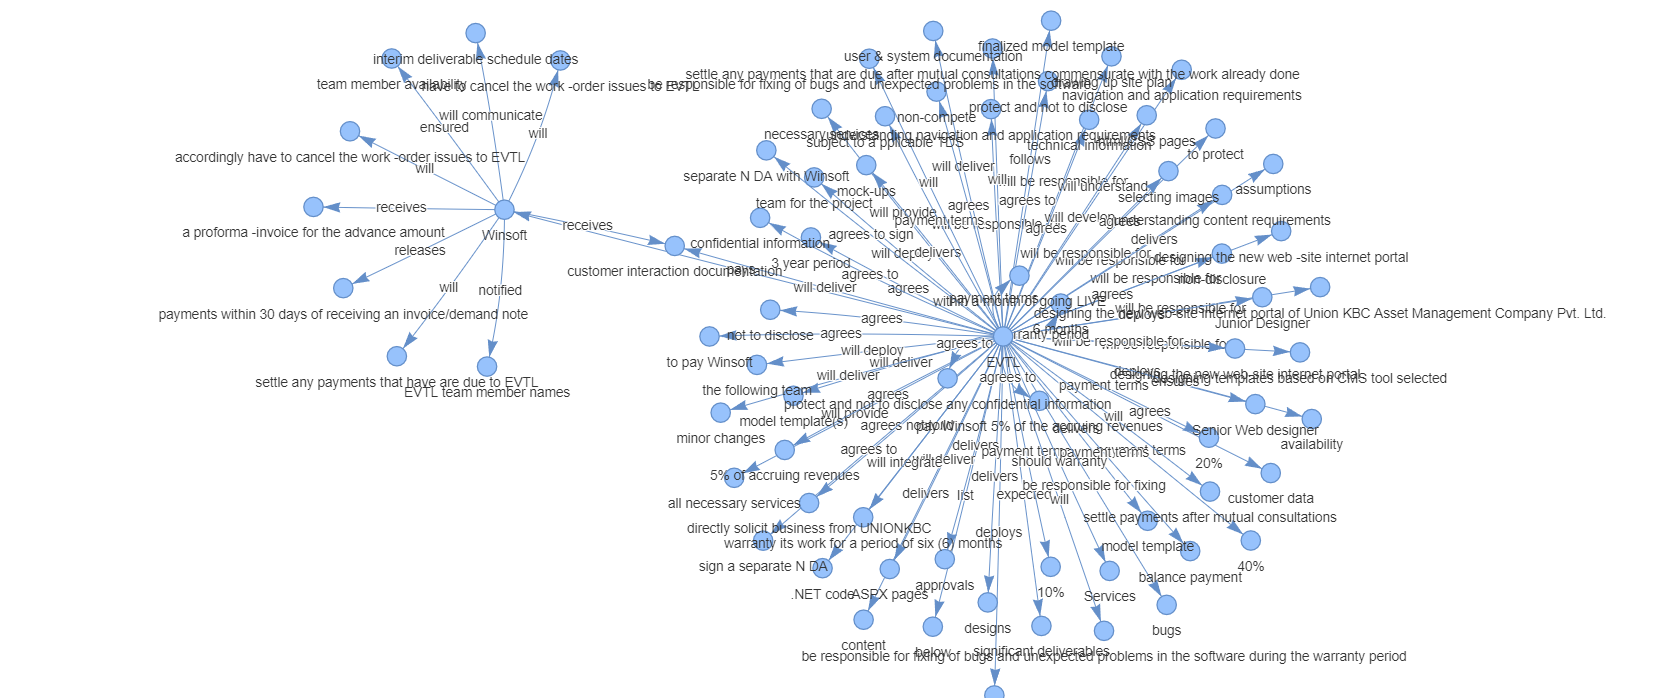

## Data Persistence

Data Retention plays an instrumental role, particularly when your knowledge graph asnd associated index are intricate or have necessitated significant computational effort for their construction,

By persisting the data we can effortlessly retrieve the data for future analysis without the need for a complete rebuild

In [ ]:
storage_context.persist()

saves a folder with below info

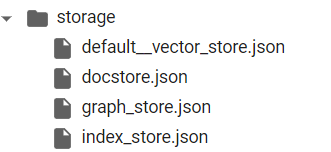

In [ ]:
from google.colab import drive
import shutil
drive.mount('/content/drive')